In [1]:
#Importing the data file on 311 NYC system Department of Housing Preservation and Development 
import pandas as pd
file="D:\Python\edx\Capstone project\data_311_correct.csv"
df=pd.read_csv(file)
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [2]:
#Looking at the dataset information
#Objective: Should the Department of Housing Preservation and Development of New York City 
# focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe)
# for the specific type of complaints you identified in response to Question 1?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Unique Key              int64  
 2   Created Date            object 
 3   Closed Date             object 
 4   Complaint Type          object 
 5   Location Type           object 
 6   Incident Zip            float64
 7   Incident Address        object 
 8   Street Name             object 
 9   Address Type            object 
 10  City                    object 
 11  Status                  object 
 12  Resolution Description  object 
 13  Borough                 object 
 14  Latitude                float64
 15  Longitude               float64
dtypes: float64(3), int64(2), object(11)
memory usage: 734.8+ MB


In [3]:
# Lets make a new data frame for this question pertianing to complaint type, borough, street name and incident zip
df_Q2=df[['Complaint Type','Borough','Street Name','Incident Zip','Status']]
df_Q2.head()

,Complaint Type,Borough,Street Name,Incident Zip,Status
0,HEAT/HOT WATER,MANHATTAN,WEST 52 STREET,10019.0,Open
1,UNSANITARY CONDITION,BROOKLYN,67 STREET,11204.0,Open
2,HEAT/HOT WATER,QUEENS,37 AVENUE,11372.0,Open
3,HEAT/HOT WATER,BRONX,SOUTHERN BOULEVARD,10458.0,Open
4,APPLIANCE,BROOKLYN,78 STREET,11209.0,Open


In [4]:
# Lets see if there is any NaN or null value in this dataframe
df_Q2.isnull().sum()

Complaint Type        0
Borough               0
Street Name       52825
Incident Zip      80697
Status                0
dtype: int64

In [5]:
# As seen in Q1, heat/hot water has highest complaints that needs to be focused.
# But we need to combine Heat/Hot water and Heating first and then count the complaints ine ach borough

In [6]:
import numpy as np
df_Q2['Complaint Type'] = np.where(df_Q2['Complaint Type']=='HEATING','HEAT/HOT WATER',df_Q2['Complaint Type'])

C:\Users\Home\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
df_Q2_heat = df_Q2[df_Q2['Complaint Type'] == "HEAT/HOT WATER"]
df_Q2_heat.head()

,Complaint Type,Borough,Street Name,Incident Zip,Status
0,HEAT/HOT WATER,MANHATTAN,WEST 52 STREET,10019.0,Open
2,HEAT/HOT WATER,QUEENS,37 AVENUE,11372.0,Open
3,HEAT/HOT WATER,BRONX,SOUTHERN BOULEVARD,10458.0,Open
5,HEAT/HOT WATER,BRONX,MORRIS AVENUE,10456.0,Open
7,HEAT/HOT WATER,QUEENS,81 STREET,11372.0,Open


In [8]:
# Finding counts for each borough
# Q1. For the complaint types that you selected in the previous module that had at least 80,000 complaints 
# logged, which borough had the highest number of complaints submitted?
# Q2. For the complaint types that you selected in the previous module that had a total number that exceeded 
# 80,000 complaints, which borough had the lowest number of complaints submitted?
df_borough=df_Q2_heat['Borough'].value_counts()
df_borough

BRONX            606133
BROOKLYN         574845
MANHATTAN        423039
Unspecified      282917
QUEENS           244122
STATEN ISLAND     18368
Name: Borough, dtype: int64

In [9]:
# Finding counts for zip code
# Q3. For the complaint types that you selected in the previous module that had at least 80,000 complaints logged,
# which ZIP code had the highest number of complainted submitted?
df_zip=df_Q2_heat['Incident Zip'].value_counts().head(10)
df_zip

11226.0    69041
10467.0    66073
10458.0    65372
10468.0    58190
10453.0    57818
10452.0    49802
10457.0    46885
10031.0    44777
10040.0    44478
10456.0    44051
Name: Incident Zip, dtype: int64

In [10]:
# Finding counts for strret name
# Q4. For the complaint types that you selected in the previous module that had at least 80,000 complaints logged, 
# the address 89-21 Elmhurst Avenue had the highest number of complainted submitted?
df_street=df_Q2_heat['Street Name'].value_counts().head(10)
df_street

GRAND CONCOURSE             37863
BROADWAY                    24484
OCEAN AVENUE                18716
MORRIS AVENUE               16409
ARDEN STREET                15963
ST NICHOLAS AVENUE          15612
ELMHURST AVENUE             12410
AMSTERDAM AVENUE            12279
BOYNTON AVENUE              11137
DR M L KING JR BOULEVARD    10417
Name: Street Name, dtype: int64

In [11]:
# Q5. For the complaint types that you selected in the previous module that had at least 80,000 complaints logged, 
# how many of the submitted tickets were closed?

df_Q2_heat['Status'].value_counts()

Closed     2133331
Open         16091
Pending          2
Name: Status, dtype: int64

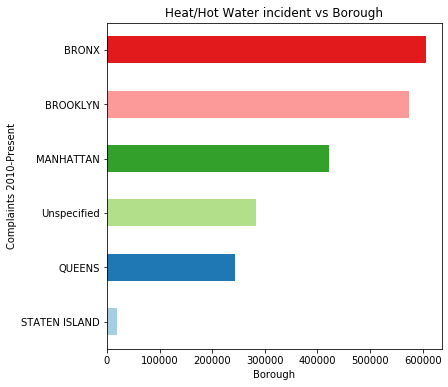

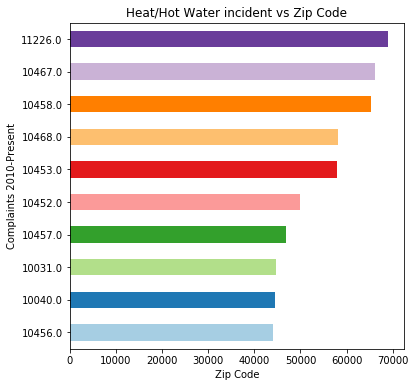

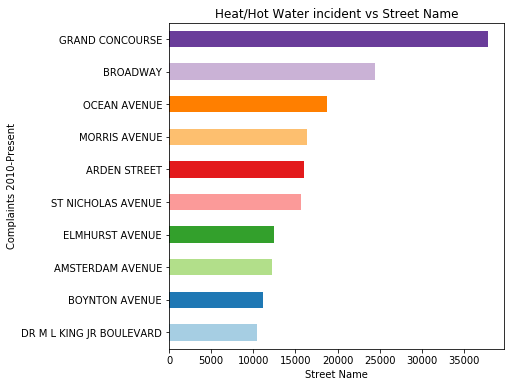

In [12]:
# Visualization for these graphs
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
df_borough.sort_values(ascending = True, inplace =True)
df_borough.plot(kind='barh',figsize = (6,6), color=sns.color_palette('Paired', len(df_borough)))
plt.xlabel('Borough')
plt.ylabel('Complaints 2010-Present')
plt.title('Heat/Hot Water incident vs Borough')

plt.figure()
df_zip.sort_values(ascending = True, inplace =True)
df_zip.head(10).plot(kind='barh',figsize = (6,6), color=sns.color_palette('Paired', len(df_zip)))
plt.xlabel('Zip Code')
plt.ylabel('Complaints 2010-Present')
plt.title('Heat/Hot Water incident vs Zip Code')

plt.figure()
df_street.sort_values(ascending = True, inplace =True)
df_street.head(10).plot(kind='barh',figsize = (6,6), color=sns.color_palette('Paired', len(df_street)))
plt.xlabel('Street Name')
plt.ylabel('Complaints 2010-Present')
plt.title('Heat/Hot Water incident vs Street Name')

plt.show()